# Tutorial - Machine Learning para Economistas

## Tutorial 4 - Parte I

**Objetivo:** Correr regresiones lineales. Estimar polinomios y encontrar el ECM.

Veremos:
- Introducción a Numpy y Scikit-learn
- Regresión lineal y polinómica
- Estadísticas (símil Stata o R)
- Encontrar el ECM

##      NumPy y scikit-learn                   
**El paquete NumPy** es fundamental en Python. Está escrito en lenguajes de bajo nivel, lo que permite realizar operaciones matemáticas de manera muy eficiente. Para más información, ver la [guía oficial de uso de NumPy](https://docs.scipy.org/doc/numpy/user/index.html).

**El paquete scikit-learn** es una biblioteca de Python usada para machine learning, construida encima de NumPy y otros paquetes. Permite procesar datos, reducir la dimensionalidad de la base, implementar regresiones, clasificaciones, clustering y más. Pueden ver la [web de scikit-learn](https://scikit-learn.org/stable/)


In [68]:
# Importamos paquetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Numpy

A continuación crearemos dos vectores con los que trabajaremos en nuestra primera regresión lineal.

In [70]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)
# Ambos son vectores fila

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [72]:
# Reshape para transformar x en un vector columna
x = x.reshape((-1, 1))   # El -1 indica el largo del array
# Es equivalente a: x = x.reshape((6, 1))

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


### REGRESIÓN LINEAL CON SCIKIT-LEARN
Ahora utilizaremos la función [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) del paquete scikit-learn.
    
Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Booleano que decide si calcular el intercepto (True) o considerarlo igual a cero (False). Por default es True.
- **normalize**: Booleano que decide si normalizar las variables input (True) o no (False). Es False por default.
- **copy_X**: Booleano que decide si copiar (True) o sobreescribir las variables input (False). Es True por default.

In [74]:
# Primero, estimar el modelo. Lo hacemos con fit():
model = LinearRegression().fit(x, y)

In [76]:
# Veamos ahora los resultados

# Calculamos el R2
r2 = model.score(x, y)
print('Coeficiente de determinación:', r2)

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)


Coeficiente de determinación: 0.715875613747954

Intercepto: 5.633333333333333

Pendiente: [0.54]


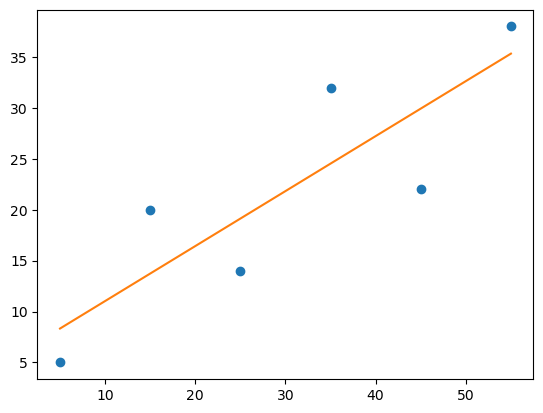

In [78]:
# Hacemos un scatter plot
plt.plot(x, y, 'o')
plt.plot(x, pendiente*x + intercepto)


In [80]:
# Supongamos que ahora queremos predecir con este modelo.
# Aplicamos .predict(), metemos los valores del regresor en el modelo estimado y
# obtenemos la correspondiente respuesta predicha.

y_pred = model.predict(x)
print('Respuesta predicha:\n', y_pred)

# Recordemos cómo era nuestro vector y
print('\nEl vector de y:', y)

# Con la y predicha podemos calcular el R^2 de esta otra forma
r2_new = r2_score(y, y_pred)
print("\nResultado anterior:", r2, "\nResultado nuevo:", r2_new)

Respuesta predicha:
 [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]

El vector de y: [ 5 20 14 32 22 38]

Resultado anterior: 0.715875613747954 
Resultado nuevo: 0.715875613747954


In [82]:
# Si quiero probar valores nuevos de x (no los que usé para estimar el modelo):
x_new = np.arange(start=10, stop=20, step=2).reshape((-1, 1))   # Generamos valores entre [10, 20), con saltos de 2 en 2
print(x_new)

y_pred_new = model.predict(x_new)
print('\nNueva respuesta predicha:\n', y_pred_new)


[[10]
 [12]
 [14]
 [16]
 [18]]

Nueva respuesta predicha:
 [11.03333333 12.11333333 13.19333333 14.27333333 15.35333333]


In [84]:
# Para regresión lineal múltiple es lo mismo:
# Armamos un vector para la variable dependiente y una matriz de regresores:
x = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])

y =  np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(x)
print(y)


[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [86]:
# Estimamos el modelo
model = LinearRegression().fit(x, y)
r2 = model.score(x, y)

# Miramos resultados
print('Coeficiente de determinación:', r2)
print('\nIntercepto:', model.intercept_)
print('\nCoeficientes:', model.coef_)

Coeficiente de determinación: 0.8615939258756776

Intercepto: 5.52257927519819

Coeficientes: [0.44706965 0.25502548]


In [88]:
# Vemos la respuesta predicha para los valores originales de los regresores
y_pred = model.predict(x)
print('Respuesta predicha:', y_pred, sep='\n')

Respuesta predicha:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [90]:
# Vemos la predicción para nuevos valores de X
x_new = np.arange(start=1, stop=31, step=3).reshape((-1, 2))   # Matriz con 2 columnas y tantas filas como tenga el array
print(x_new)
y_new = model.predict(x_new)
print('Nueva respuesta predicha:', y_new, sep='\n')

[[ 1  4]
 [ 7 10]
 [13 16]
 [19 22]
 [25 28]]
Nueva respuesta predicha:
[ 6.98975085 11.20232163 15.41489241 19.62746319 23.84003398]


### REGRESIÓN POLINÓMICA
Si queremos correr una regresión de y contra x y x^2 necesitamos generar los datos de la nueva variable independiente.

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) (de scikitlearn) genera una nueva matriz que consta de todas las combinaciones polinomiales de las x con un grado menor o igual al grado especificado. Por ejemplo, si una muestra de entrada es bidimensional y de la forma [a, b], las características polinomiales de grado 2 son [1, a, b, a^2, ab, b^2].

Se pueden cambiar varios parámetros de PolynomialFeatures:

- **degree** es un entero (2 por default) que representa el grado de la función de regresión polinómica.

- **include_bias** es un Booleano (True por default) que decide si incluir la columna de 1 que corresponde al intercepto (True) o no (False).


In [92]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))   # ¿Por qué reshape?
y = np.array([15, 11, 2, 8, 25, 32])   # Vector fila
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


In [98]:
model_pol = PolynomialFeatures(include_bias=False, degree = 2)
model_pol.fit(x)
x_ = model_pol.transform(x)   # Aplicamos transformación a los datos. Genera una matriz de 6x2 (con x y x^2)
# equivalente a: x_ = model_pol.fit_transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [100]:
# Ahora usamos x_ para correr la regresión
model_pol = LinearRegression().fit(x_, y)


In [102]:
print('Coeficiente de determinación:', model_pol.score(x_, y))
print('\nIntercepto:', model_pol.intercept_)
print('\nCoeficientes:', model_pol.coef_)

Coeficiente de determinación: 0.8908516262498564

Intercepto: 21.37232142857143

Coeficientes: [-1.32357143  0.02839286]


### Imitando a Stata con statsmodels

[statsmodels](https://www.statsmodels.org/stable/index.html) proporciona clases y funciones para la estimación de modelos estadísticos, para realizar pruebas estadísticas y para explorar datos estadísticos.

In [104]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [106]:
# Especificamos el modelo
model = sm.OLS(y, x)
# Ajustamos el modelo
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00713
Time:                        20:40:25   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [108]:
# Si solo queremos ver los coeficientes
print(results.params)

[5.52257928 0.44706965 0.25502548]


In [110]:
# También lo podemos imprimir los resultados para latex
print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.862   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.806   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     15.56   \\
\textbf{Date:}             & Tue, 15 Oct 2024 & \textbf{  Prob (F-statistic):} &  0.00713    \\
\textbf{Time:}             &     20:40:53     & \textbf{  Log-Likelihood:    } &   -24.316   \\
\textbf{No. Observations:} &           8      & \textbf{  AIC:               } &     54.63   \\
\textbf{Df Residuals:}     &           5      & \textbf{  BIC:               } &     54.87   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [112]:
# Se puede obtener la respuesta predicha con los valores de x utilizados en el
# entrenamiento del modelo usando .fittedvalues o .predict():

print('predicted response:\n', results.fittedvalues) #equivalente: results.predict(x)

predicted response:
 [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


###     ERROR CUADRÁTICO MEDIO

Ahora veamos algunas métricas de evaluación usuales para los problemas de regresión en Machine Learning.

Vamos a observar los valores de las siguientes métricas:

**Error Cuadrático Medio / Mean Squared Error**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{f}(x_i))^2$

**Raíz del Error Cuadrático Medio / Root Mean Squared Error**

$RMSE = \sqrt{MSE}$

**Error Absoluto Medio / Mean Absolute Error**

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{f}(x_i)|$


In [114]:
# Generamos un dataset aleatorio
np.random.seed(0)
x = np.random.rand(100, 1)  # Array de la forma (100, 1) con nros aleatorios entre [0, 1) de una distribución uniforme
y = 2 + 3*x + np.random.rand(100, 1)
print("x:\n", x)
print("y:\n", y)

x:
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]
 [0.79172504]
 [0.52889492]
 [0.56804456]
 [0.92559664]
 [0.07103606]
 [0.0871293 ]
 [0.0202184 ]
 [0.83261985]
 [0.77815675]
 [0.87001215]
 [0.97861834]
 [0.79915856]
 [0.46147936]
 [0.78052918]
 [0.11827443]
 [0.63992102]
 [0.14335329]
 [0.94466892]
 [0.52184832]
 [0.41466194]
 [0.26455561]
 [0.77423369]
 [0.45615033]
 [0.56843395]
 [0.0187898 ]
 [0.6176355 ]
 [0.61209572]
 [0.616934  ]
 [0.94374808]
 [0.6818203 ]
 [0.3595079 ]
 [0.43703195]
 [0.6976312 ]
 [0.06022547]
 [0.66676672]
 [0.67063787]
 [0.21038256]
 [0.1289263 ]
 [0.31542835]
 [0.36371077]
 [0.57019677]
 [0.43860151]
 [0.98837384]
 [0.10204481]
 [0.20887676]
 [0.16130952]
 [0.65310833]
 [0.2532916 ]
 [0.46631077]
 [0.24442559]
 [0.15896958]
 [0.11037514]
 [0.65632959]
 [0.13818295]
 [0.19658236]
 [0.36872517]
 [0.82099323]
 [0.09710128]
 [0.83794491]
 [0.09609841]
 [0.97645947]
 [

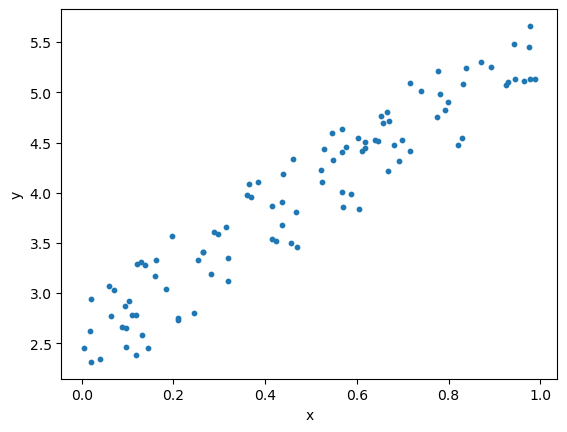

In [116]:
# Graficamos
plt.scatter(x, y, s=10)  # s indica el tamaño de los puntos del scatter.
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [118]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     921.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.22e-51
Time:                        20:42:30   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5581      0.054     47.751      0.0

In [120]:
# Predecimos las y
y_pred = results.predict(x)
y_pred

array([4.1696989 , 4.65827012, 4.32812546, 4.15815731, 3.80216397,
       4.45478107, 3.84307721, 5.17681698, 5.38792493, 3.68407562,
       4.88302102, 4.11120696, 4.22617188, 5.27614181, 2.76668104,
       2.81393966, 2.61745238, 5.00311071, 4.84317706, 5.11291512,
       5.43184275, 4.90484995, 3.91323773, 4.8501438 , 2.90539891,
       4.43724078, 2.97904427, 5.33214853, 4.09051427, 3.77575598,
       3.33496109, 4.83165679, 3.89758877, 4.22731534, 2.61325723,
       4.3717982 , 4.35553037, 4.36973821, 5.32944444, 4.56028015,
       3.61379333, 3.84144667, 4.60670965, 2.7349352 , 4.51607453,
       4.52744237, 3.17587916, 2.93667868, 3.48435148, 3.62613527,
       4.23249195, 3.84605576, 5.46049027, 2.85773982, 3.17145728,
       3.03177366, 4.47596597, 3.30188375, 3.92742542, 3.27584826,
       3.02490232, 2.88220226, 4.48542538, 2.96386132, 3.13535417,
       3.64086031, 4.96896856, 2.84322288, 5.01874803, 2.84027791,
       5.4255031 , 3.93429821, 5.42638883, 4.33423978, 4.72896

In [122]:
# Vemos el MSE

# Usando MSE de scikit-learn
mse1 = mean_squared_error(y, y_pred)
print(mse1)

# Usando Numpy
mse2 = np.square(np.subtract(y, y_pred)).mean()
print(mse2)
# Cuidado! Nos dio distinto porque las funciones de Numpy no trabajan igual con arrays.
# Veamos cómo solucionar esto

0.07623324582875009
1.5097383028596258


In [124]:
y_flat = y.flatten()   # Modificamos la forma de y
print(y.shape, y_flat.shape)
print("y flat:", y_flat)
print("y:",  y)

(100, 1) (100,)
y flat: [4.32425705 4.41557607 4.54348415 4.59683809 3.51971754 4.51383967
 3.90480357 5.24757091 5.11406991 4.10307357 4.82230049 4.43309343
 4.40361296 5.07422687 3.02690599 2.65789364 2.94175839 5.07913241
 5.21620561 5.30256803 5.66110931 4.89880007 4.34052172 4.98557773
 2.77867833 4.52615628 2.44925306 5.13558157 4.2257185  3.53406343
 3.41168227 4.75146977 3.50392506 4.00358417 2.62633431 4.44377925
 4.41061242 4.50400281 5.48334751 4.47687933 3.9750703  3.67865773
 4.52875851 3.07259977 4.80649414 4.71580219 2.73137457 3.30626151
 3.66052635 4.08997932 3.86003862 4.1839306  5.12761445 2.921694
 2.75045025 3.33193678 4.76664394 3.32897555 3.80611562 2.80244377
 3.17433752 2.78466811 4.69104437 3.28093118 3.56526859 3.96197885
 4.47469377 2.65128189 5.24382528 2.4599249  5.450415   3.46029159
 5.13027979 3.83305835 5.01148844 2.34148806 3.19377257 3.28867098
 3.59283499 2.38802209 3.11864369 3.86426739 2.76967108 4.31530918
 4.63401836 3.41013443 4.10537696 2.8717

In [126]:
# Volvamos a probar
# Usando MSE de scikit-learn
mse1 = mean_squared_error(y_flat, y_pred)
print(mse1)

# Usando Numpy
mse2 = np.square(np.subtract(y_flat, y_pred)).mean()
print(mse2)
# Ahora sí obtenemos el mismo resultado

0.07623324582875009
0.07623324582875009


In [128]:
# También podemos ver el RMSE y el MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)
mae = mean_absolute_error(y, y_pred)
print(mae)

0.27610368673516494
0.23709498511190305
